In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

### Load data

In [2]:
data = pd.read_csv("data_Foody_pre.csv")

In [3]:
data = data[['restaurant', 'review_score', 'review_text_t1']]
data.head()

,restaurant,review_score,review_text_t1
0,Good Morning Restaurant,8.2,hải_sản ghé rẻ đẹp
1,Hạt Dẻ Trùng Khánh,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...
2,Bột - Healthy & Weight Loss Food - Shop Online,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử
3,Bánh Giò Chợ Nguyễn Công Trứ,8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...
4,Quán Quảng - Bún Quảng,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38676 entries, 0 to 38675
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   restaurant      38676 non-null  object 
 1   review_score    38676 non-null  float64
 2   review_text_t1  38676 non-null  object 
dtypes: float64(1), object(2)
memory usage: 906.6+ KB


### Wordcloud for each group

In [5]:
data['target'] = 0 # negative
data['target'][data['review_score']>7] = 2 # positive
data['target'][(data['review_score']>=5)&(data['review_score']<=7)] = 1 # neutral

<ipython-input-5-3c929ee446fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][data['review_score']>7] = 2 # positive
<ipython-input-5-3c929ee446fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][(data['review_score']>=5)&(data['review_score']<=7)] = 1 # neutral


In [6]:
data.head()

,restaurant,review_score,review_text_t1,target
0,Good Morning Restaurant,8.2,hải_sản ghé rẻ đẹp,2
1,Hạt Dẻ Trùng Khánh,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...,2
2,Bột - Healthy & Weight Loss Food - Shop Online,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử,2
3,Bánh Giò Chợ Nguyễn Công Trứ,8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...,2
4,Quán Quảng - Bún Quảng,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...,2


In [9]:
df_group0=data[data.target==0]
df_group0['target'].value_counts()

0    5742
Name: target, dtype: int64

In [10]:
df_group1=data[data.target==1]
df_group1['target'].value_counts()

1    4465
Name: target, dtype: int64

In [11]:
df_group2=data[data.target==2]
df_group2['target'].value_counts()

2    28469
Name: target, dtype: int64

In [13]:
# Convert into text
text_0=[]
for row in df_group0['review_text_t1']:
      text_0.append(row)
text_0=str(text_0)

text_1=[]
for row in df_group1['review_text_t1']:
      text_1.append(row)
text_1=str(text_1)

text_2=[]
for row in df_group2['review_text_t1']:
      text_2.append(row)
text_2=str(text_2)

In [40]:
list_of_words=['ăn','uống','quán','nhà_hàng','lắm','ghé','toàn','đem','chả','vô','kêu','hơi','chiên','nướng','phục_vụ','thử','bảo','sốt','kèm']
for word in list_of_words:
  STOPWORDS.add(word)

In [35]:
wc=WordCloud(background_color='Black',max_words=2000,stopwords=STOPWORDS)

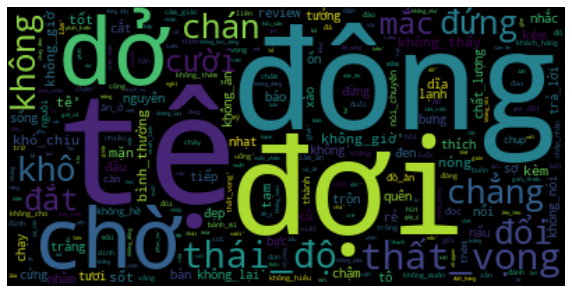

In [36]:
# Wordcloud của group 0
wc.generate(text_0)
plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Nhận xét:
* Một số keywords nổi bật là: dở, đông, tệ, đợi, chờ, thất_vọng, thái_độ, chán, mắc, đắt
* Có thể thấy, nội dung của group này là mô tả các review tiêu cực về các cửa hàng, quán ăn (một số vấn đề nổi trội là: quán quá đông, đợi lâu, thái độ nhân viên tệ, thức ăn dở, khô và mắc,...)

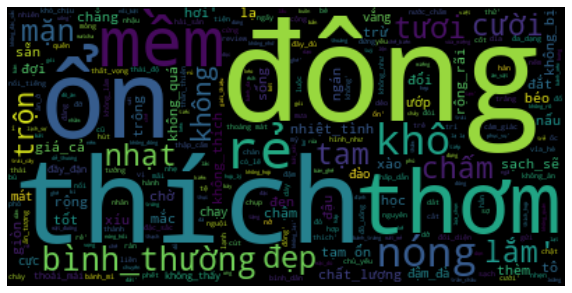

In [41]:
# wordcloud của group 1 
wc.generate(text_1)
plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Nhận xét:
* Một số keywords nổi bật là: ổn, đông, thích, thơm, nóng, khô, rẻ, bình_thường, tạm
* Có thể thấy, nội dung của group này là mô tả các review trung lập về các cửa hàng, quán ăn (Bên cạnh những ưu điểm như: giá cả rẻ, đồ ăn thơm, nóng thì vẫn có khuyết điểm tồn tại như đồ ăn nhạt, khô, mặn, quán đông và nóng)

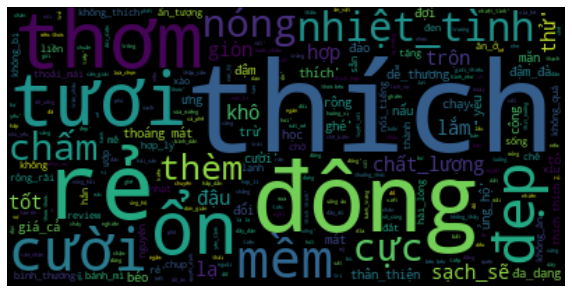

In [42]:
# wordcould của group 2 (entertainment)
wc.generate(text_2)
plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Nhận xét:
* Một số keywords nổi bật là: thích, rẻ, ổn, cười, đẹp, thơm, tươi, nhiệt_tình, sạch_sẽ
* Có thể thấy, nội dung của group này là mô tả các review tích cực về các cửa hàng, quán ăn (Các quán ăn hay nhà hàng này có những ưu điểm nổi bật là: giá cả ở mức rẻ và ổn, nhân viên phục vụ thân thiện, nhiệt tình, quán sạch sẽ, thức ăn tươi ngon và thơm)